# PROJECT

---

## START BY DEPENDENCIES

In [142]:
%matplotlib inline

In [143]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import f_oneway
data = pd.read_csv("Resources/heart_2020_cleaned.csv")
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [144]:
heart_disease_count = data['HeartDisease'].value_counts()


print("Number of individuals with heart disease:", heart_disease_count)

Number of individuals with heart disease: HeartDisease
No     292422
Yes     27373
Name: count, dtype: int64


### Clean The Data for Patients with Heart Desease

In [145]:
cleaned_data= data[data['HeartDisease'] == 'Yes']
cleaned_data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
5,Yes,28.87,Yes,No,No,6.0,0.0,Yes,Female,75-79,Black,No,No,Fair,12.0,No,No,No
10,Yes,34.30,Yes,No,No,30.0,0.0,Yes,Male,60-64,White,Yes,No,Poor,15.0,Yes,No,No
35,Yes,32.98,Yes,No,Yes,10.0,0.0,Yes,Male,75-79,White,Yes,Yes,Poor,4.0,No,No,Yes
42,Yes,25.06,No,No,No,0.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,7.0,No,No,Yes
43,Yes,30.23,Yes,No,No,6.0,2.0,Yes,Female,75-79,White,Yes,Yes,Fair,8.0,No,Yes,No


In [146]:
heart_disease_count = cleaned_data['HeartDisease'].value_counts().loc['Yes']


print("Number of individuals with heart disease:", heart_disease_count)

Number of individuals with heart disease: 27373


## Race Vs Heart Disease

HeartDisease                        No    Yes  Heart Disease%
Race                                                         
American Indian/Alaskan Native    4660    542           10.42
Asian                             7802    266            3.30
Black                            21210   1729            7.54
Hispanic                         26003   1443            5.26
Other                            10042    886            8.11
White                           222705  22507            9.18


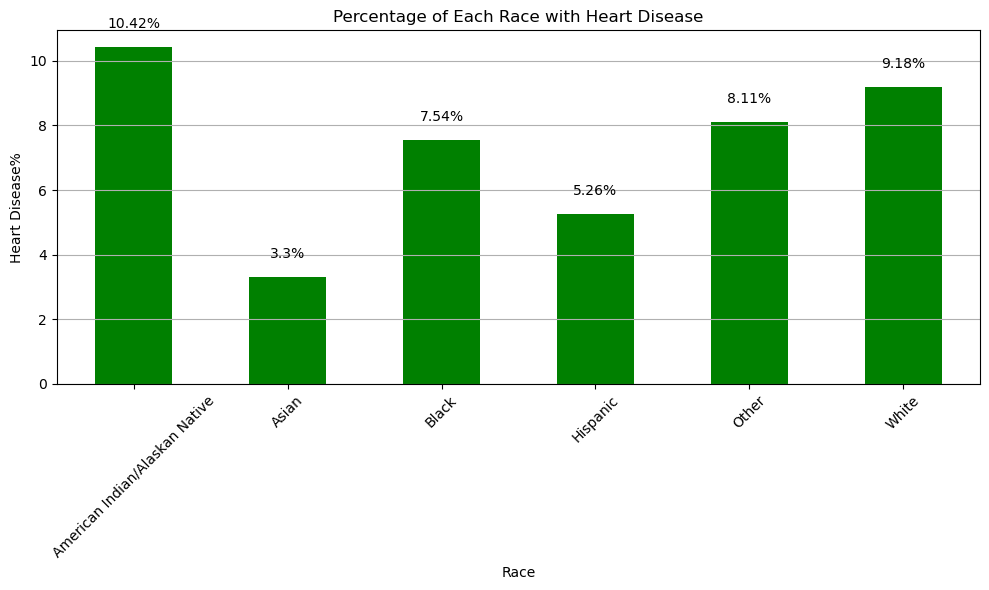

In [172]:
race_counts = data.groupby('Race').size()

# Group by Race and Heart Disease
race_vs_heart = data.groupby(['Race', 'HeartDisease']).size().unstack(fill_value=0)

# Calculate percentage of individuals with heart disease for each race group
race_vs_heart['Heart Disease%'] = round((race_vs_heart['Yes'] / race_counts) * 100, 2)
print(race_vs_heart)
plt.figure(figsize=(10, 6))
ax = race_vs_heart['Heart Disease%'].plot(kind='bar', color='Green')

plt.xlabel('Race')
plt.ylabel('Heart Disease%')
plt.title('Percentage of Each Race with Heart Disease')
plt.xticks(rotation=45)
plt.grid(axis='y')

for bar in ax.patches:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 0.5, f"{height}%", ha='center', va='bottom')

plt.tight_layout()
plt.savefig("output/Race_vs_HeartDisease1.png")
plt.show()

### summary stastics for races

In [174]:
total_cases = race_vs_heart.sum()

# Mean number of heart disease cases across all racial groups
mean_race = race_vs_heart.mean()

# Median number of heart disease cases across all racial groups
median_rase = race_vs_heart.median()

# Standard deviation of heart disease cases across all racial groups
std_race = race_vs_heart.std()

# Summary statistics DataFrame
summary_statistics = pd.DataFrame({
    'Total Races': total_cases,
    'Mean': mean_race ,
    'Median': median_rase ,
    'Std Deviation': std_race
})

print(summary_statistics)

                Total Races          Mean     Median  Std Deviation
HeartDisease                                                       
No                292422.00  48737.000000  15626.000   85621.486425
Yes                27373.00   4562.166667   1164.500    8808.019832
Heart Disease%        43.81      7.301667      7.825       2.613200


## Physical Health Vs Heart Disease

HeartDisease          No    Yes  Heart Disease Percentage
PhysicalCategory                                         
Excellent         247510  17533                  6.615153
Very Good          12918   1691                 11.575056
Good                7854   1273                 13.947628
Fair                4445   1014                 18.574831
Poor                3262    782                 19.337290
Bad                 1543    461                 23.003992


<Figure size 1000x600 with 0 Axes>

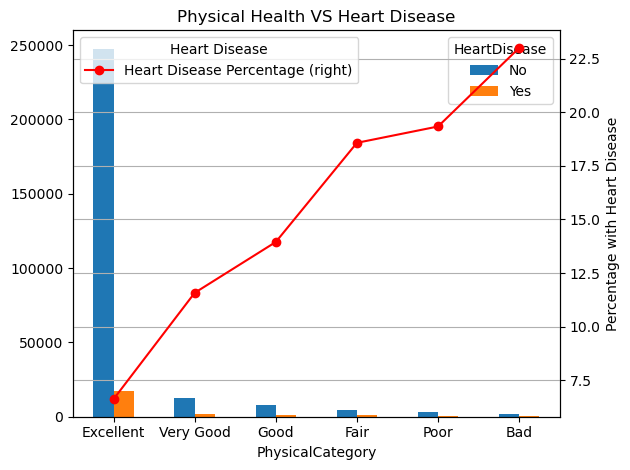

In [182]:
# Define bins and labels for physical health
bins_Physical = [0, 5, 10, 15, 20, 25, 30]
labels_Physical = ['Excellent', 'Very Good', 'Good', 'Fair', 'Poor', 'Bad']

# Bin the 'PhysicalHealth' column
data['PhysicalCategory'] = pd.cut(data['PhysicalHealth'], bins=bins_Physical, labels=labels_Physical, right=False)

# Group by 'PhysicalCategory' and 'HeartDisease' and count
Physical_vs_Health = data.groupby(['PhysicalCategory', 'HeartDisease'], observed=True).size().unstack(fill_value=0)
total_count_per_category = Physical_vs_Health.sum(axis=1)

# Calculate percentage of individuals with heart disease within each physical health category
Physical_vs_Health['Heart Disease Percentage'] = (Physical_vs_Health['Yes'] / total_count_per_category) * 100

print(Physical_vs_Health)

plt.figure(figsize=(10, 6))
ax = Physical_vs_Health[['No', 'Yes']].plot(kind='bar', stacked=False)
Physical_vs_Health['Heart Disease Percentage'].plot(kind='line', marker='o', color='red', secondary_y=True)

# Add labels and title for the bar chart
plt.xlabel('Physical Health Category')
plt.ylabel('Number of Patients')
plt.title('Physical Health VS Heart Disease')

# Add labels and title for the line chart
plt.ylabel('Percentage with Heart Disease')
plt.legend(title='Heart Disease', loc='upper left')
plt.grid(axis='y')

plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("output/Physical_vs_heartdisease.png")
plt.show()

### Summary stastics for physical health vs Heart disease

In [180]:
total_cases = Physical_vs_Health.sum()

# Mean number of heart disease cases across all racial groups
mean_phy = Physical_vs_Health.mean()

# Median number of heart disease cases across all racial groups
median_phy = Physical_vs_Health.median()

# Standard deviation of heart disease cases across all racial groups
std_phy = Physical_vs_Health.std()

# Summary statistics DataFrame
summary_statisticsPhy = pd.DataFrame({
    'Total Cases': total_cases,
    'Mean': mean_phy,
    'Median': median_phy,
    'Std Deviation ': std_phy
})

print(summary_statisticsPhy)

                            Total Cases          Mean       Median  \
HeartDisease                                                         
No                        277532.000000  46255.333333  6149.500000   
Yes                        22754.000000   3792.333333  1143.500000   
Heart Disease Percentage      92.610841     15.435140    16.219216   

                          Std Deviation   
HeartDisease                              
No                          98676.445505  
Yes                          6744.591720  
Heart Disease Percentage        5.873266  


## General Health VS Heart disease

<Figure size 1000x600 with 0 Axes>

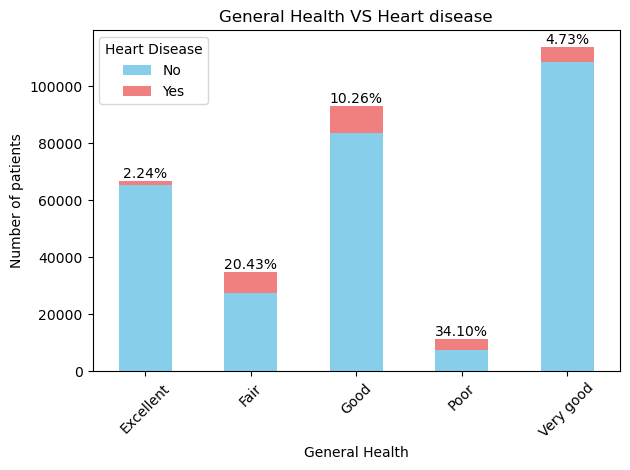

In [183]:
Gen_vs_HeartDisease = data.groupby(['GenHealth', 'HeartDisease']).size().unstack(fill_value=0)
total_count_per_category = Gen_vs_HeartDisease.sum(axis=1)

# Calculate percentage of individuals with heart disease within each general health category
Gen_vs_HeartDisease['Heart Disease Percentage'] = (Gen_vs_HeartDisease['Yes'] / total_count_per_category) * 100

# Plotting
plt.figure(figsize=(10, 6))
ax = Gen_vs_HeartDisease[['No', 'Yes']].plot(kind='bar', stacked=True, color=['skyblue', 'lightcoral'])

# Add percentage labels on the bars
for x, (no_count, yes_count) in enumerate(zip(Gen_vs_HeartDisease['No'], Gen_vs_HeartDisease['Yes'])):
    total_count = no_count + yes_count
    plt.text(x, no_count + yes_count, f"{yes_count / total_count * 100:.2f}%", ha='center', va='bottom', color='black')

# Add labels and title for the chart
plt.xlabel('General Health')
plt.ylabel('Number of patients')
plt.title('General Health VS Heart disease')

plt.xticks(rotation=45)
plt.legend(title='Heart Disease')
plt.tight_layout()
plt.savefig("output/General_vs_heartdisease.png")
plt.show()

### Summary stastics for General Heath vs Heart disease

In [184]:
total_cases = Gen_vs_HeartDisease.sum()

# Mean number of heart disease cases across all racial groups
mean_gen = Gen_vs_HeartDisease.mean()

# Median number of heart disease cases across all racial groups
median_gen = Gen_vs_HeartDisease.median()

# Standard deviation of heart disease cases across all racial groups
std_gen = Gen_vs_HeartDisease.std()

# Summary statistics DataFrame
summary_statisticsGen = pd.DataFrame({
    'Total Cases': total_cases,
    'Mean': mean_gen,
    'Median': median_gen,
    'Std Deviation ': std_gen
})

print(summary_statisticsGen)

                            Total Cases          Mean        Median  \
HeartDisease                                                          
No                        292422.000000  58484.400000  65342.000000   
Yes                        27373.000000   5474.600000   5381.000000   
Heart Disease Percentage      71.765865     14.353173     10.263183   

                          Std Deviation   
HeartDisease                              
No                          41035.154707  
Yes                          3070.417529  
Heart Disease Percentage       13.067554  
